# Capitulo 3 - Autovalores y autovectores

In [1]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

Calculamos los autovalores y autovectores de la matriz
$$
A = \begin{pmatrix}
2 & 3 \\
2 & 1
\end{pmatrix}
$$

In [2]:
A = np.array([[2,3],[2,1]])
Id = np.eye(2)
print(Id)

[[1. 0.]
 [0. 1.]]


In [3]:
# Espacio de autovectores del autovalor lambda = -1
scipy.linalg.null_space(A+Id)

array([[-0.70710678],
       [ 0.70710678]])

In [4]:
# Espacio de autovectores del autovalor lambda = 4
scipy.linalg.null_space(A-4*Id)

array([[0.83205029],
       [0.5547002 ]])

In [5]:
# Autovalores y autovectores con el comando eig
np.linalg.eig(A)

(array([ 4., -1.]),
 array([[ 0.83205029, -0.70710678],
        [ 0.5547002 ,  0.70710678]]))

In [6]:
# Podemos usar también eigvals para los autovalores
np.linalg.eigvals(A)

array([ 4., -1.])

In [7]:
# Matrices de cambios de base para llevar A a la forma diagonal
C_BE = np.array([[1,3],[-1,2]])
print(C_BE)

[[ 1  3]
 [-1  2]]


In [8]:
C_EB = np.linalg.inv(C_BE)
B = C_EB @ A @ C_BE
print(B)

[[-1.0000000e+00 -8.8817842e-16]
 [ 0.0000000e+00  4.0000000e+00]]


In [9]:
def metodo_potencia (A,k):
    v = np.random.rand(np.shape(A)[0],1)
    for i in range (k) :
        v = A@v
        v = v / np.linalg.norm(v,2)
        
    return v

In [10]:
v = metodo_potencia(A,100)
print(v)

[[0.83205029]
 [0.5547002 ]]


In [22]:
def metodo_potencia2 (A):
    tol = 0.0001
    dif = tol + 1
    v = np.random.rand(np.shape(A)[0],1)
    vector_dif = []
    
    while (dif > tol) :
        v_1 = A@v
        v_1 = v_1 / np.linalg.norm(v_1,2)
        dif =np.linalg.norm((v-v_1),2) 
        v = v_1
        vector_dif.append(dif)
        
    return v, vector_dif

In [34]:
v,vector_dif = metodo_potencia2(A)
print(v)


[[0.83205436]
 [0.5546941 ]]


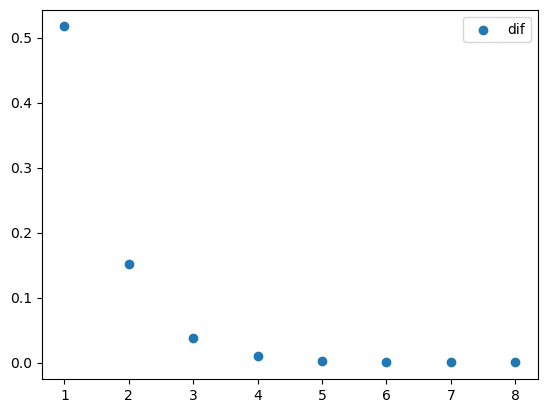

In [38]:
x = np.arange(1,len(vector_dif)+1)              
plt.figure()
plt.scatter(x, vector_dif, label="dif")
plt.legend()

## Método de la potencia

Para 
$$
A = \begin{pmatrix}
0.9 & 0.15 & 0.25 \\
0.075 & 0.8 &  0.25 \\
0.025 & 0.05 & 0.5
\end{pmatrix}
$$
y $v = (1, 2, 3)$, calcular $A^k v$ para distintos valores de $k$.

In [ ]:
A = np.array([[0.9, 0.15, 0.25], [0.075, 0.8, 5.25], [0.025, 0.05, 0.5]])
v = np.array([-1,20,15])

In [ ]:
A @ v

In [ ]:
A @ A @ v

In [ ]:
def estado(A, v, k):
    for i in range(k):
        v = A @ v
        print(v)
    return(v)

In [ ]:
estado(A, v, 50)

In [ ]:
w = np.array([3.75, 1.875, 0.375])
A @ w

In [ ]:
ev = np.linalg.eigvals(A)
print(ev)

In [ ]:
# Que pasa si cambiamos A por una matriz cualquiera?
A = np.random.rand(3,3)
print(estado(A, v, 50))

In [ ]:
# Modificamos el programa anterior, normalizando en norma-2 en cada paso
def estado_normalizado(A, v, k):
    for i in range(k):
        v = A @ v
        v = v / np.linalg.norm(v,2)
        print(v)
    return(v)

In [ ]:
estado_normalizado(A, v, 50)

Repetir para la matriz
$$
A = \begin{pmatrix}
3 & 1 & 2 \\
0 & 1 & -2 \\
1 & 2 & 4
\end{pmatrix}
$$ y $v = (1,2,3)$.

In [ ]:
A = -np.array([[3,1,2], [0,1,-2], [1,2,4]])
v = np.array([1,2,3])
v50 = estado_normalizado(A, v, 50)
print(v50)

In [ ]:
np.linalg.eigvals(A)

In [ ]:
np.linalg.norm(A@v50)

In [ ]:
# Autovalores de A
np.linalg.eigvals(A)

In [ ]:
# Si introducimos una pequeña modificacion en A, la matriz resulta diagonalizable
A = np.array([[1.0001,1,0],[0,0.999,1],[0,0,1]])
np.linalg.eig(A)

In [ ]:
# Matriz diaogonalizable
A = np.array([[-1,3,-1],[-3,5,-1],[-3,3,1]])
np.linalg.eig(A)

In [ ]:
# Usamos null space para calcular los autovectores
A = np.array([[0,1,0],[0,0,1],[0,0,0]])
scipy.linalg.null_space(A)

# Norma-2 de matrices

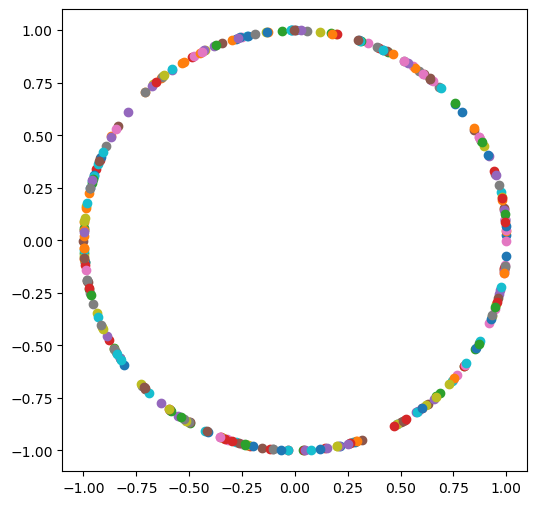

In [16]:
# Graficamos 300 puntos al azar en la circunferencia de radio 1
plt.figure(figsize=(6,6))
for i in range(300):
    p = np.random.rand()*2*np.pi
    plt.scatter(np.cos(p), np.sin(p))

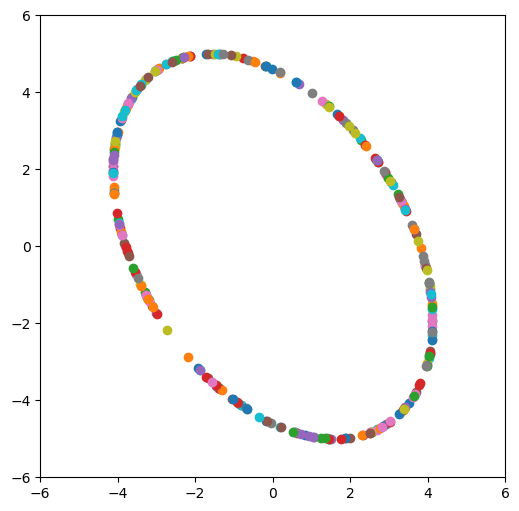

In [17]:
# Norma-2 para matrices simétricas
A = np.array([[1,4], [4,-3]])

# Tomamos 300 puntos al azar en la circunferencia y graficamos las imágenes
plt.figure(figsize=(6,6))
plt.xlim((-6,6))
plt.ylim((-6,6))
for i in range(300):
    p = np.random.rand()*2*np.pi
    v = np.array([np.cos(p), np.sin(p)])
    Av = A @ v
    plt.scatter(Av[0], Av[1])
    

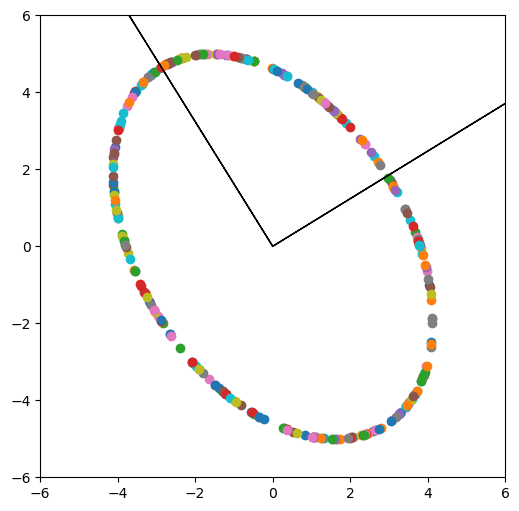

In [18]:
# Agregamos los autovectores de A

# Norma-2 para matrices simétricas
A = np.array([[1,4], [4,-3]])

# Tomamos 300 puntos al azar en la circunferencia y graficamos las imágenes
plt.figure(figsize=(6,6))
plt.xlim((-6,6))
plt.ylim((-6,6))
for i in range(300):
    p = np.random.rand()*2*np.pi
    v = np.array([np.cos(p), np.sin(p)])
    Av = A @ v
    plt.scatter(Av[0], Av[1])

# Graficamos los autovectores de A
e = np.linalg.eig(A)
evec1 = e[1][0:2,0]*10
evec2 = e[1][0:2,1]*10

plt.arrow(0,0,evec1[0], evec1[1])
plt.arrow(0,0,evec2[0], evec2[1])

In [ ]:
# Norma-2 para matrices en general
A = np.array([[1,3], [-1,5]])

# Tomamos 300 puntos al azar en la circunferencia y graficamos las imágenes
plt.figure(figsize=(6,6))
plt.xlim((-6,6))
plt.ylim((-6,6))
for i in range(300):
    p = np.random.rand()*2*np.pi
    v = np.array([np.cos(p), np.sin(p)])
    Av = A @ v
    plt.scatter(Av[0], Av[1])
    
# Graficamos los autovectores de A
e = np.linalg.eig(A)
evec1 = e[1][0:2,0]*10
evec2 = e[1][0:2,1]*10

plt.arrow(0,0,evec1[0], evec1[1])
plt.arrow(0,0,evec2[0], evec2[1])    

In [ ]:
# Agregamos las imágenes de los autovectores de A.T @ A

# Norma-2
A = np.array([[1,3], [-1,5]])

# Tomamos 300 puntos al azar en la circunferencia y graficamos las imágenes
plt.figure(figsize=(6,6))
plt.xlim((-6,6))
plt.ylim((-6,6))
for i in range(300):
    p = np.random.rand()*2*np.pi
    v = np.array([np.cos(p), np.sin(p)])
    Av = A @ v
    plt.scatter(Av[0], Av[1])

# Graficamos las imágenes de los autovectores de A.T @ A
e = np.linalg.eig(A.T@A)
evec1 = A@e[1][0:2,0]*10
evec2 = A@e[1][0:2,1]*10

plt.arrow(0,0,evec1[0], evec1[1])
plt.arrow(0,0,evec2[0], evec2[1])
